# Importing libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from math import sqrt

from sklearn import model_selection
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.decomposition import PCA

F:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
# Importing data
#your_local_path = "F:/kanchan/job 2019/for GIT/Bigmart_Sales/"
df_train = pd.read_csv  ("train.csv" )

# EDA

In [3]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.1+ KB


In [4]:
# Finding unique values in each column
df_train.apply(lambda x : len(x.unique()))

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     4
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [5]:
df_train.head(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [6]:
# Making copy of the file
df_train_copy = df_train.copy()

In [7]:
def replace_val(string): 
    """
    converts values into binary value
    param : string 
    returns : integer
    
    """
    
    if string =='Low Fat' or string== 'low fat' or string =='LF':
        return 0
    else: 
        return 1

In [8]:
def preprocess(df):
    """
    Cleaning the dataset
    param : dataframe
    returns : dataframe
    
    """
    df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)
    df['Item_Fat_Content'].apply(replace_val)
    df['Outlet_Size'].fillna(df['Outlet_Size'].mode())
    
    df['Outlet_Establishment_Year']=df['Outlet_Establishment_Year'].apply(lambda x : str(x))
    df=pd.get_dummies(df)
    # Normalization
    df = (df-df.min())/(df.max()-df.min())

    return df

In [9]:
df_train_copy=preprocess(df_train_copy)

In [10]:
df_train_copy.head(5)

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
0,0.282525,0.048866,0.927507,0.283587,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.081274,0.058705,0.072068,0.031419,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
2,0.770765,0.051037,0.468288,0.158115,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.871986,0.000000,0.640093,0.053555,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0
4,0.260494,0.000000,0.095805,0.073651,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [11]:
df_train_copy.describe()

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,...,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,0.494352,0.201382,0.465635,0.164551,0.000704,0.000821,0.000939,0.000352,0.000587,0.000469,...,0.109351,0.327702,0.280183,0.280183,0.326763,0.393054,0.127068,0.654347,0.108882,0.109703
std,0.251630,0.157123,0.264327,0.130729,0.026525,0.028648,0.030625,0.018759,0.024215,0.021660,...,0.312098,0.469403,0.449115,0.449115,0.469057,0.488457,0.333069,0.475609,0.311509,0.312538
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.283120,0.082187,0.265437,0.061359,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.494352,0.164228,0.474209,0.134908,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.681453,0.288026,0.655156,0.235030,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
corr = df_train_copy.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_High,Outlet_Size_Medium,Outlet_Size_Small,Outlet_Location_Type_Tier 1,Outlet_Location_Type_Tier 2,Outlet_Location_Type_Tier 3,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3
Item_Weight,1.000000e+00,-0.012049,0.024756,0.011550,-0.007899,0.031462,-0.024957,-0.016186,-0.038657,-0.020883,...,0.012313,0.004152,-0.001100,0.003965,-0.014675,0.010447,0.002568,-0.002649,0.001299,1.433223e-14
Item_Visibility,-1.204853e-02,1.000000,-0.001315,-0.128625,-0.017581,-0.010041,0.040746,0.005817,-0.027297,-0.019113,...,-0.041937,-0.081061,0.063502,0.061346,-0.068787,0.009650,0.286400,-0.144249,-0.034671,-5.114446e-02
Item_MRP,2.475610e-02,-0.001315,1.000000,0.567574,0.000372,0.010633,0.021750,0.014643,0.018948,0.004688,...,0.002438,-0.004510,0.009793,-0.001229,0.001951,-0.000744,-0.004277,0.004885,0.003850,-6.713699e-03
Item_Outlet_Sales,1.155000e-02,-0.128625,0.567574,1.000000,-0.005253,0.001091,0.007780,-0.007294,0.003515,0.011040,...,0.024170,0.204701,-0.098403,-0.111287,0.058261,0.046376,-0.411727,0.108765,-0.038059,3.111920e-01
Item_Identifier_DRA12,-7.899029e-03,-0.017581,0.000372,-0.005253,1.000000,-0.000761,-0.000814,-0.000498,-0.000643,-0.000575,...,0.004875,-0.009106,-0.006709,-0.016559,0.009803,0.005812,0.003156,0.000688,0.004924,-9.316965e-03
Item_Identifier_DRA24,3.146217e-02,-0.010041,0.010633,0.001091,-0.000761,1.000000,-0.000879,-0.000538,-0.000695,-0.000621,...,0.003078,-0.002565,0.000353,0.000353,-0.002509,0.002085,0.013657,-0.004999,-0.010022,3.041515e-03
Item_Identifier_DRA59,-2.495669e-02,0.040746,0.021750,0.007780,-0.000814,-0.000879,1.000000,-0.000575,-0.000743,-0.000664,...,0.001537,0.003089,-0.002060,0.006472,-0.013185,0.006711,0.011314,-0.009948,0.001586,1.500298e-03
Item_Identifier_DRB01,-1.618576e-02,0.005817,0.014643,-0.007294,-0.000498,-0.000538,-0.000575,1.000000,-0.000455,-0.000407,...,0.013468,0.013551,-0.011707,0.002221,-0.013073,0.010512,-0.007159,0.000486,-0.006559,1.342747e-02
Item_Identifier_DRB13,-3.865714e-02,-0.027297,0.018948,0.003515,-0.000643,-0.000695,-0.000743,-0.000455,1.000000,-0.000525,...,0.007037,-0.006592,-0.004326,-0.004326,0.003783,0.000345,0.005306,0.007420,-0.008469,-8.504687e-03
Item_Identifier_DRB24,-2.088313e-02,-0.019113,0.004688,0.011040,-0.000575,-0.000621,-0.000664,-0.000407,-0.000525,1.000000,...,-0.007593,-0.003587,-0.001456,-0.001456,0.019553,-0.017438,-0.008267,0.015749,-0.007574,-7.606377e-03


# Modelling

In [13]:
def normalized_rmse(dependent_column,actual,prediction):
    result = (sqrt(metrics.mean_squared_error(actual, prediction)))/(dependent_column.max()-dependent_column.min())
    return result

In [14]:
# Defining independant and dependant variables
y=df_train_copy.Item_Outlet_Sales
x=df_train_copy.copy()
x.drop(["Item_Outlet_Sales"],axis=1,inplace=True)

In [15]:
# splitting the data into train and test with 70:30 ratio
x_train,x_test, y_train,  y_test = train_test_split(x, y, test_size=0.30, random_state=42)

In [16]:
#listing out the different ML Algorithms
models = []
#creating tupeles and initializing the algorithms
models.append(('Linear Regression', LinearRegression())) 
models.append(('Ridge Regression', Ridge(alpha = 5)))
models.append(('Lasso Regression', Lasso(alpha = 0.01)))
models.append(('Random Forest Regressor', RandomForestRegressor(max_depth = 5, min_samples_split=2, n_estimators = 10, random_state = 7)))


In [17]:
#function to run the models for the datasets
def allmodels():
    #creating dataframe
    model_list = pd.DataFrame(columns=("Model","MAE","MSE","RMSE","NMRSE"))
    #indexing
    rownumber = 0
    for name, model in models:
        regressor = model #refering the tuple
        regressor.fit(x_train, y_train)
        
        # prediction
        Y_predict = regressor.predict(x_test)
            
        #filling the dataframe
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"MAE"] = round(metrics.mean_absolute_error(y_test, Y_predict),3)
        model_list.loc[rownumber,"MSE"]= round(metrics.mean_squared_error(y_test, Y_predict),3)
        model_list.loc[rownumber,"RMSE"]= round(np.sqrt(metrics.mean_squared_error(y_test, Y_predict)),3)
        #model_list.loc[rownumber,"NMRSE"] = round(normalized_rmse(y,y_test,Y_predict),3)
        
        #filling data to next row
          
        rownumber += 1
        #sorting the RMSE values in ascending order
    return (model_list.sort_values(by="RMSE",ascending=True))

In [18]:
print (allmodels())

                     Model          MAE          MSE         RMSE NMRSE
3  Random Forest Regressor        0.057        0.007        0.081   NaN
1         Ridge Regression        0.064        0.007        0.086   NaN
2         Lasso Regression        0.077         0.01        0.101   NaN
0        Linear Regression  2.54069e+10  3.77617e+23  6.14506e+11   NaN


We will reduce the dimensions and recheck the RMSE value

Text(23,5.1,'23')

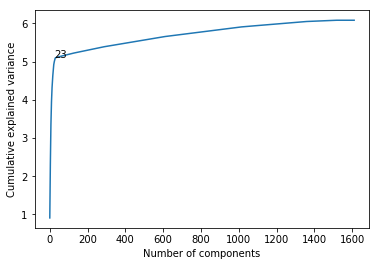

In [19]:
# Applying PCA
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_train, y_train, test_size=0.20, random_state=7,shuffle=True)
pca = PCA()
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)
ev= pca.explained_variance_ratio_
#plt.plot(ev)
var_values = pca.explained_variance_
plt.plot(np.cumsum(var_values))

plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.annotate('23',xy=(23, 5.1))


In [20]:
x_train, x_test, y_train, y_test = model_selection.train_test_split(x_train, y_train, test_size=0.20, random_state=7,shuffle=True)
pca = PCA(n_components= 23)
x_train = pca.fit_transform(x_train)
x_test = pca.transform(x_test)

In [21]:
#listing out the different ML Algorithms
models = []
#creating tupeles and initializing the algorithms
models.append(('Linear Regression', LinearRegression())) 
models.append(('Ridge Regression', Ridge(alpha = 5)))
models.append(('Lasso Regression', Lasso(alpha = 0.01)))
models.append(('Random Forest Regressor', RandomForestRegressor(max_depth = 5, min_samples_split=2, n_estimators = 10, random_state = 7)))


In [24]:
#function to run the models for the datasets
def allmodels():
    #creating dataframe
    model_list = pd.DataFrame(columns=("Model","MAE","MSE","RMSE","NMRSE"))
    #indexing
    rownumber = 0
    for name, model in models:
        regressor = model #refering the tuple
        regressor.fit(x_train, y_train)
        
        # prediction
        Y_predict = regressor.predict(x_test)
            
        #filling the dataframe
        model_list.loc[rownumber,"Model"]= name
        model_list.loc[rownumber,"MAE"] = round(metrics.mean_absolute_error(y_test, Y_predict),3)
        model_list.loc[rownumber,"MSE"]= round(metrics.mean_squared_error(y_test, Y_predict),3)
        model_list.loc[rownumber,"RMSE"]= round(np.sqrt(metrics.mean_squared_error(y_test, Y_predict)),3)
        #model_list.loc[rownumber,"NMRSE"] = round(normalized_rmse(y,y_test,Y_predict),3)
        
        #filling data to next row
          
        rownumber += 1
        #sorting the RMSE values in ascending order
    return (model_list.sort_values(by="RMSE",ascending=True))

In [25]:
print (allmodels())

                     Model    MAE    MSE   RMSE NMRSE
0        Linear Regression  0.066  0.008  0.088   NaN
1         Ridge Regression  0.066  0.008  0.088   NaN
3  Random Forest Regressor  0.064  0.008  0.089   NaN
2         Lasso Regression  0.089  0.013  0.115   NaN


PCA has not further reduced the RMSE value hence, we will go with the previous model

# Conclusion 
Since Random Forest Regressor gives least RMSE value among others , it is the best algorithm to predict the sales for this dataset. 